In [1]:
import warnings
import numpy as np
import obspy
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

In [3]:
# load a sample
fname = '2007_034_45_117472.dat'

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    st = obspy.read(fname)  # st: stream

In [4]:
# convert to numpy.ndarray
n_channels = st.__len__()  # 24: eight 3-component geophone data
ts_len = st[0].data.shape[0]  # time series length
st_ = np.zeros((n_channels, ts_len))  # [24 x 16000]; 16s x 1000Hz
for i, tr in enumerate(st):
    st_[i, :] = tr.data  # (16000,)
st = st_  # [24 x 16000]

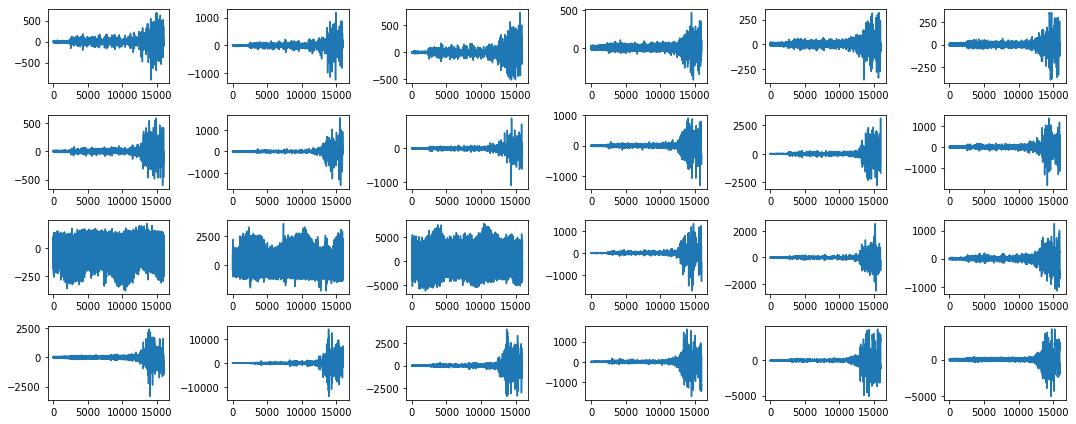

In [5]:
# plot the time series
fig, axes = plt.subplots(4, 6, figsize=(15, 1.5*4))
for i, ax in enumerate(axes.flatten()):
    ax.plot(st[i])
plt.tight_layout()
plt.show();

In [6]:
# convert the time series into a spectrogram
sampling_freq = 1000  # [Hz]
f, t, Sxx = spectrogram(st, fs=sampling_freq, nperseg=80)  # Sxx: spectrogram; (n_sensors, H, W)
Sxx = np.abs(Sxx)

# log scale
Sxx = np.log10(Sxx + 1.)

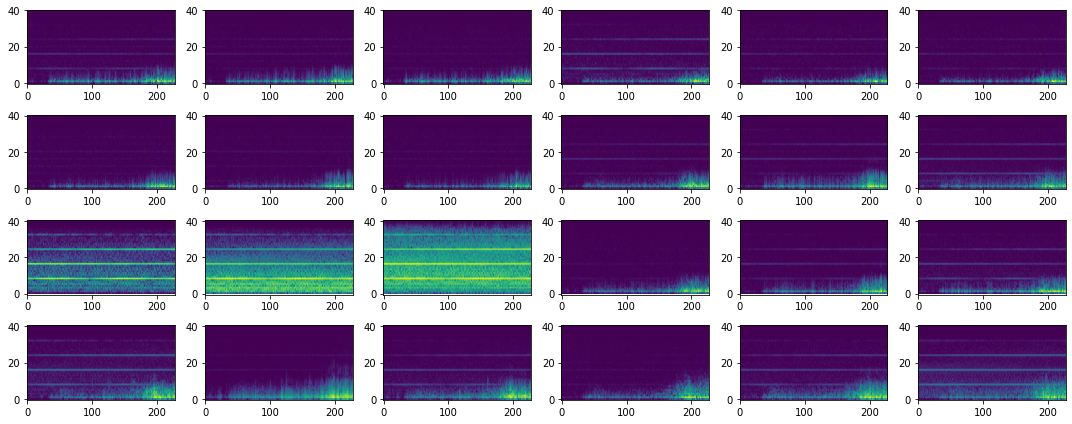

In [7]:
# plot the sppectrograms
fig, axes = plt.subplots(4, 6, figsize=(15, 1.5*4))
for i, ax in enumerate(axes.flatten()):
    im = ax.imshow(Sxx[i], aspect='auto')
    ax.invert_yaxis()
plt.tight_layout()
plt.show();